In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### DataFrame


In [ ]:
df = pd.read_excel('Violencia de genero.xlsx', parse_dates=['Timestamp'])

In [ ]:
df

,Timestamp,Género,Nivel máximo de estudios,Alcaldía,Edad,¿Has escuchado alguna vez sobre la existencia de la violencia de género?,¿Consideras un problema la violencia de género?,¿Alguna ves has presenciado violencia de género?,¿Donde has presenciado violencia de género?,¿Cuáles crees que podrían ser formas de Violencia de género?,¿Por qué motivo crees que se dé la violencia de género?,¿Dentro de tu núcleo familiar has visto alguna vez violencia de género?,¿Qué te provoca esta encuesta?
0,2021-03-26 19:19:18.000,Mujer,Maestría,Azcapotzalco,32,Sí,Sí,Sí,"En la familia, En el trabajo, En la escuela, E...","Golpear, empujar, Agredir psicológicamente","Falta de educacion, Negligencia por parte de l...",Sí,Me importa
1,2021-03-26 19:24:59.776,Mujer,Universidad,Gustavo A. Madero,25,Sí,Sí,Sí,"En la familia, En la escuela",Todas las anteriores,"Falta de educacion, Religión, Costumbre familiar",Sí,Indiferencia
2,2021-03-26 19:28:15.634,Mujer,Preparatoria,Venustiano Carranza,20,Sí,Sí,Sí,En la escuela,Todas las anteriores,Todas las anteriores,Tal vez,Me importa
3,2021-03-26 19:31:48.099,Mujer,Secundaria,Miguel Hidalgo,21,Sí,Sí,Sí,Todas las anteriores,Todas las anteriores,Todas las anteriores,Sí,Me importa
4,2021-03-26 19:31:49.707,Mujer,Universidad,Iztapalapa,25,Sí,Tal vez,No,Ninguno,Todas las anteriores,Falta de educacion,No,Indiferencia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,2021-04-09 10:54:20.656,Mujer,Universidad,Azcapotzalco,19,Sí,Sí,No,Ninguno,Todas las anteriores,Todas las anteriores,No,Me importa
663,2021-04-09 14:24:27.654,Mujer,Universidad,Azcapotzalco,26,Sí,Sí,Sí,En la escuela,Todas las anteriores,"Falta de educacion, Falta de cultura, Nivel ed...",No,Me importa
664,2021-04-09 16:06:01.725,Mujer,Universidad,Gustavo A. Madero,19,Sí,Sí,Sí,En el trabajo,Todas las anteriores,Todas las anteriores,Sí,Me importa
665,2021-04-09 23:51:46.923,Mujer,Universidad,Miguel Hidalgo,20,Sí,Sí,Sí,Todas las anteriores,Todas las anteriores,Falta de educacion,No,Me importa


In [ ]:
df.dtypes

Timestamp                                                                   datetime64[ns]
Género                                                                              object
Nivel máximo de estudios                                                            object
Alcaldía                                                                            object
Edad                                                                                 int64
¿Has escuchado alguna vez sobre la existencia de la violencia de género?            object
¿Consideras un problema la violencia de género?                                     object
¿Alguna ves has presenciado violencia de género?                                    object
¿Donde has presenciado violencia de género?                                         object
¿Cuáles crees que podrían ser formas de Violencia de género?                        object
¿Por qué motivo crees que se dé la violencia de género?                             object

### Fechas


In [ ]:
df['Dia'] = df['Timestamp'].dt.day
df['Mes'] = df['Timestamp'].dt.month
df['Año'] = df['Timestamp'].dt.year

In [ ]:
df['Dia'] = df['Dia'].astype(str)
df['Mes'] = df['Mes'].astype(str)
df['Año'] = df['Año'].astype(str)

In [ ]:
df["Fecha"] = df["Dia"] + "/" + df["Mes"] + '/' + df['Año']

In [ ]:
df["DiaMes"] = df["Dia"] + "/" + df["Mes"]

### Dummyes

In [ ]:
df['¿Has escuchado alguna vez sobre la existencia de la violencia de género?'] = df['¿Has escuchado alguna vez sobre la existencia de la violencia de género?'].replace({'Sí': 1, 'Tal vez': 2, 'Prefiero no contestar': 3,  'No': 0})

In [ ]:
df['¿Has escuchado alguna vez sobre la existencia de la violencia de género?'].unique()

array(['Sí', 'Tal vez', 'Prefiero no contestar', 'No'], dtype=object)

In [ ]:
df['¿Consideras un problema la violencia de género?'] = df['¿Consideras un problema la violencia de género?'].replace({'Sí': 1,
                                                                                                                        'Tal vez': 2,
                                                                                                                        'No': 0})

In [ ]:
df['¿Consideras un problema la violencia de género?'].unique()

array(['Sí', 'Tal vez', 'No'], dtype=object)

In [ ]:
df["¿Alguna ves has presenciado violencia de género?"].unique()

array(['Sí', 'No', 'Tal vez'], dtype=object)

In [ ]:
df["¿Alguna ves has presenciado violencia de género?"] = df["¿Alguna ves has presenciado violencia de género?"].replace({'Sí': 1,
                                                                                                                        'Tal vez': 2,
                                                                                                                        'No': 0})

In [ ]:
df['Beta'] = 1

### Graficas Barras


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


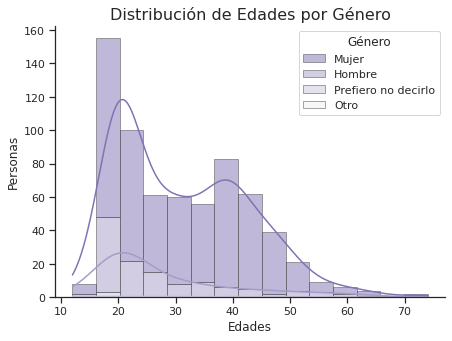

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    data=df,
    x="Edad", hue="Género",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    kde=True)

plt.xlabel("Edades", fontsize=12)
plt.ylabel("Personas", fontsize=12)
plt.title("Distribución de Edades por Género", fontsize=16)
plt.savefig('Fig0.png', orientation="horizontal", dpi = 100)

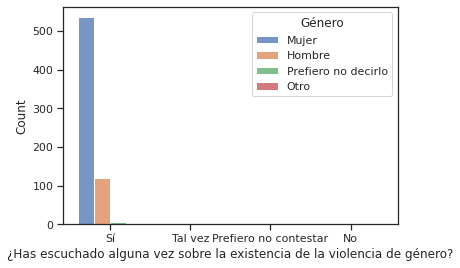

In [ ]:
sns.histplot(data=df, x="¿Has escuchado alguna vez sobre la existencia de la violencia de género?", hue="Género", multiple="dodge", shrink=.8)

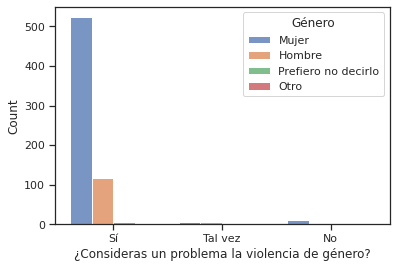

In [ ]:
sns.histplot(data=df, x="¿Consideras un problema la violencia de género?", hue="Género", multiple="dodge", shrink=.8)

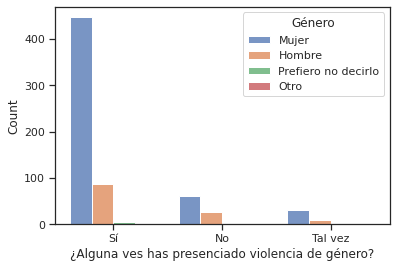

In [ ]:
sns.histplot(data=df, x="¿Alguna ves has presenciado violencia de género?", hue="Género", multiple="dodge", shrink=.8)

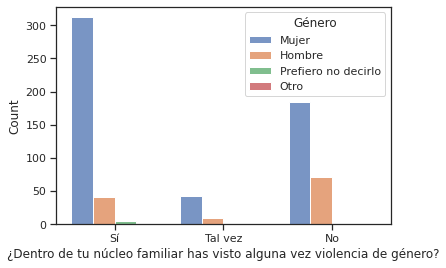

In [ ]:
sns.histplot(data=df, x="¿Dentro de tu núcleo familiar has visto alguna vez violencia de género?", hue="Género", multiple="dodge", shrink=.8)   

### Graficas lineales

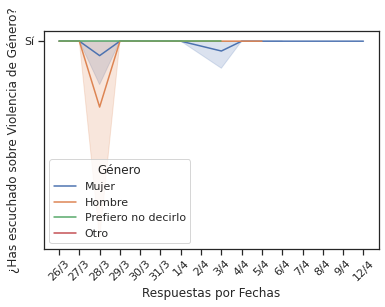

In [ ]:
sns.lineplot(y="¿Has escuchado alguna vez sobre la existencia de la violencia de género?", x ='DiaMes', hue="Género", data=df)
plt.xlabel("Respuestas por Fechas", fontsize=12)
plt.ylabel("¿Has escuchado sobre Violencia de Género?", fontsize=12)
#plt.title("¿Consideras un problema la violencia de género?", fontsize=14)
plt.xticks(rotation=45)
plt.savefig('Fig1.png', orientation="horizontal", dpi = 100)

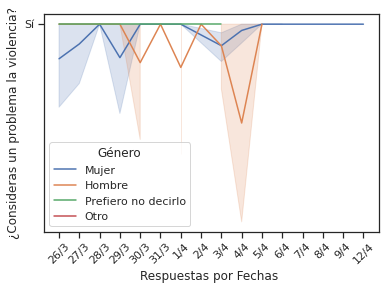

In [ ]:
sns.lineplot(y="¿Consideras un problema la violencia de género?", x ='DiaMes', hue="Género", data=df)
plt.xlabel("Respuestas por Fechas ", fontsize=12)
plt.ylabel("¿Consideras un problema la violencia?", fontsize=12)
#plt.title("¿Consideras un problema la violencia de género?", fontsize=14)
plt.xticks(rotation=45)
plt.savefig('Fig1.png', orientation="horizontal", dpi = 100)

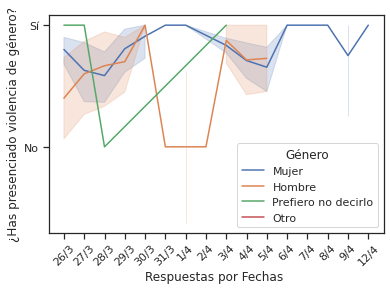

In [ ]:
sns.lineplot(y="¿Alguna ves has presenciado violencia de género?", x ='DiaMes', hue="Género", data=df)
plt.xlabel("Respuestas por Fechas ", fontsize=12)
plt.ylabel("¿Has presenciado violencia de género?", fontsize=12)
#plt.title("¿Alguna ves has presenciado violencia de género?", fontsize=12)
plt.xticks(rotation=45)
plt.savefig('Fig2.png', orientation="horizontal", dpi = 100)

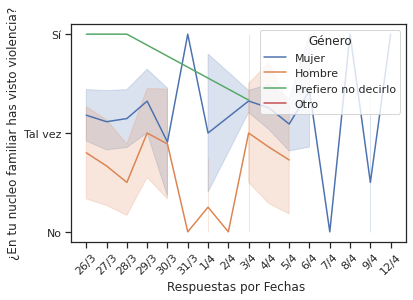

In [ ]:
sns.lineplot(y="¿Dentro de tu núcleo familiar has visto alguna vez violencia de género?", x ='DiaMes', hue="Género", data=df)
plt.xlabel("Respuestas por Fechas ", fontsize=12)
plt.ylabel("¿En tu nucleo familiar has visto violencia?", fontsize=12)
#plt.title("¿Dentro de tu núcleo familiar has visto violencia de género?", fontsize=12)
plt.xticks(rotation=45)
plt.savefig("fig3.jpg", dpi=100, bbox_inches='tight')

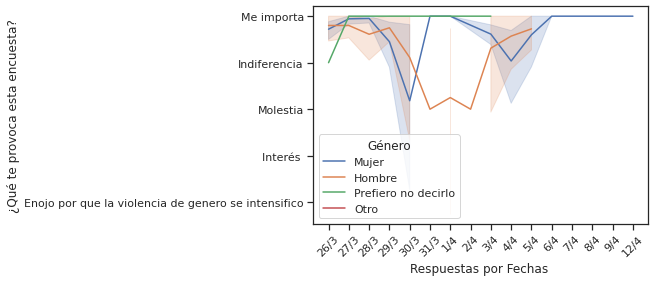

In [ ]:
g = sns.lineplot(y="¿Qué te provoca esta encuesta?", x ='DiaMes', hue="Género", data=df)
plt.xlabel("Respuestas por Fechas ", fontsize=12)
plt.ylabel("¿Qué te provoca esta encuesta?", fontsize=12)
#plt.title("¿Qué te provoca esta encuesta?", fontsize=12)
plt.xticks(rotation=45)
plt.savefig("fig4.jpg", dpi=f.dpi, bbox_inches='tight')

### Graficas Lineales por Columnas

In [ ]:
df.columns

Index(['Timestamp', 'Género', 'Nivel máximo de estudios', 'Alcaldía', 'Edad',
       '¿Has escuchado alguna vez sobre la existencia de la violencia de género?',
       '¿Consideras un problema la violencia de género?',
       '¿Alguna ves has presenciado violencia de género?',
       '¿Donde has presenciado violencia de género?',
       '¿Cuáles crees que podrían ser formas de Violencia de género?',
       '¿Por qué motivo crees que se dé la violencia de género?',
       '¿Dentro de tu núcleo familiar has visto alguna vez violencia de género?',
       '¿Qué te provoca esta encuesta?', 'Dia', 'Mes', 'Año', 'Fecha',
       'DiaMes'],
      dtype='object')

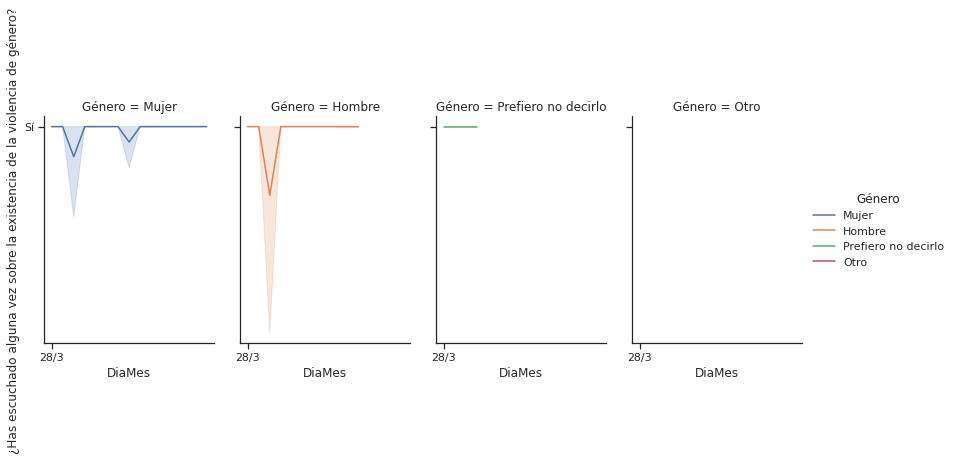

In [ ]:
g = sns.relplot(
    data=df,
    y="¿Has escuchado alguna vez sobre la existencia de la violencia de género?",
    x='DiaMes',
    hue="Género", col="Género",
    height=4, aspect=.7, kind="line")

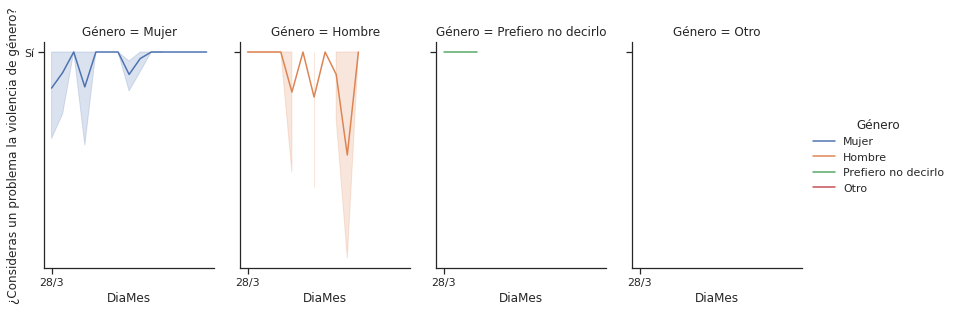

In [ ]:
g = sns.relplot(
    data=df,
    y="¿Consideras un problema la violencia de género?",
    x='DiaMes',
    hue="Género", col="Género",
    height=4, aspect=.7, kind="line")

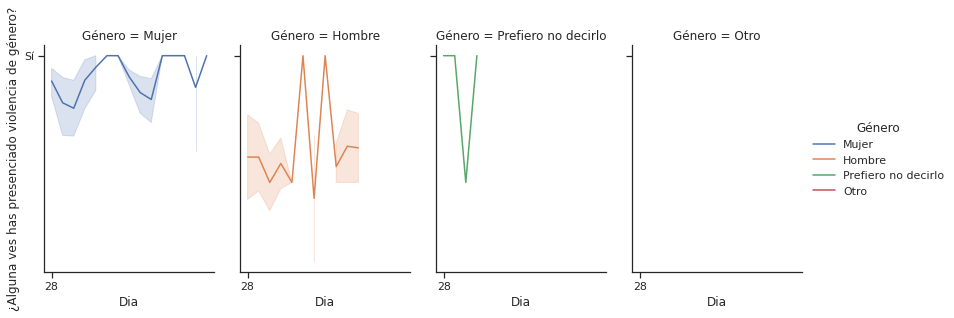

In [ ]:
sns.relplot(data=df,
    y="¿Alguna ves has presenciado violencia de género?",
    x='Dia',
    hue="Género", 
    col="Género",
    height=4, 
    aspect=.7, 
    kind="line",
    )


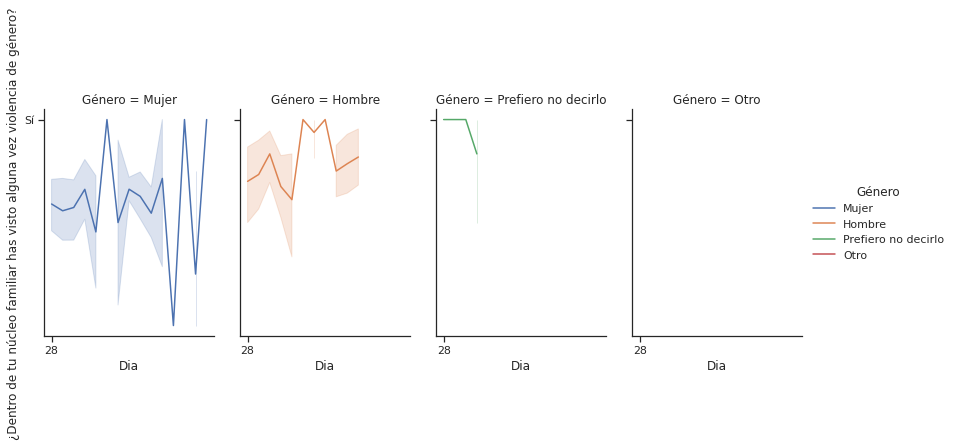

In [ ]:
sns.relplot(data=df,
    y="¿Dentro de tu núcleo familiar has visto alguna vez violencia de género?",
    x='Dia',
    hue="Género", 
    col="Género",
    height=4, 
    aspect=.7, 
    kind="line",
    )


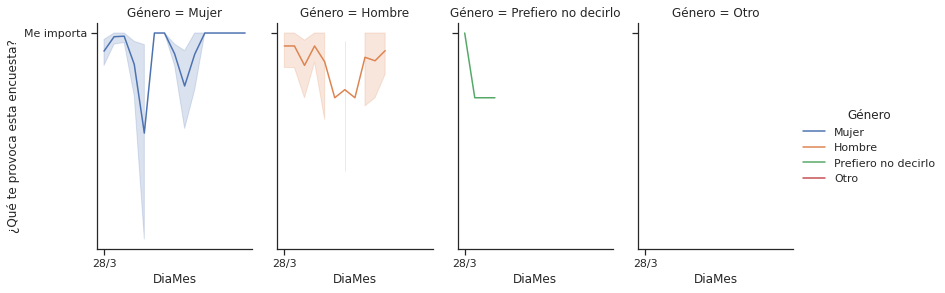

In [ ]:
sns.relplot(
    data=df,
    y="¿Qué te provoca esta encuesta?",
    x='DiaMes',
    col="Género",
    hue="Género",
    height=4, aspect=.7, kind="line")
plt.savefig('Fig4.png', orientation="horizontal")